In [1]:
# Importing Packages
import math, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from ipywidgets import interact, interactive
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
import random
from tqdm.notebook import tqdm

In [2]:
# Function for 2-D and 3-D Plot
def Rossler_ode_plot_components (x, y, z):
    plt.figure (figsize = (8.5,8.5))
    plt.plot ( t, x, linewidth = 1, color = 'b' )
    plt.plot ( t, y, linewidth = 1, color = 'r' )
    plt.plot ( t, z, linewidth = 1, color = 'g' )
    plt.grid ( True )
    plt.xlabel ( '<--- Time --->' )
    plt.ylabel ( '<--- x(t), y(t), z(t) --->' )
    plt.title ( 'Rossler Time Series Plot' )

    plt.legend(['x','y','z'], loc = 2)
    plt.savefig ( 'Rossler_ode_components.png' )
    plt.show ( )
    return

def Rossler_ode_plot_3d (x, y, z):
    fig = plt.figure ( figsize = (8.5,8.5))
    ax = fig.add_subplot(projection='3d')
    ax.plot ( x, y, z, linewidth = 0.5, color = 'orangered' )
    ax.grid ( True )
    ax.set_xlabel ( '<--- x(t) --->' )
    ax.set_ylabel ( '<--- y(t) --->' )
    ax.set_zlabel ( '<--- z(t) --->' ,rotation=90)

    plt.savefig ( 'Rossler_ode_3d.png' )
    plt.show ( )
    return

In [3]:
#Compute the time-derivative of a Rossler system
def x_dot(x1, y1, z1):
    x1_dot=-y1 - z1
    return x1_dot

def y_dot(x1, y1, z1):
    y1_dot= x1+a*y1
    return y1_dot

def z_dot(x1, y1, z1,c):
    z1_dot=b+z1*(x1-c)
    return z1_dot

In [4]:
# 4th order Runge Kutta (RK-4) numerical method
def RungeKutta4(a1,b1,c1,n,c):
    x1 = np.zeros(n)
    y1 = np.zeros(n)
    z1 = np.zeros(n)
    t = np.zeros(n)

    x1[0] = a1
    y1[0] = b1
    z1[0] = c1

    t[0] = 0
    dt = 0.01

    #Come the approximate soion at elly spaced times.
    for k in tqdm(range(n-1)):

        t[k+1] = t[k] + dt

        k1 = x_dot(x1[k], y1[k], z1[k])
        l1 = y_dot(x1[k], y1[k], z1[k])
        m1 = z_dot(x1[k], y1[k], z1[k],c)

        k2 = x_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt))
        l2 = y_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt))
        m2 = z_dot((x1[k] + 0.5*k1*dt), (y1[k] + 0.5*l1*dt), (z1[k] + 0.5*m1*dt),c)

        k3 = x_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt))
        l3 = y_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt))
        m3 = z_dot((x1[k] + 0.5*k2*dt), (y1[k] + 0.5*l2*dt), (z1[k] + 0.5*m2*dt),c)

        k4 = x_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt))
        l4 = y_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt))
        m4 = z_dot((x1[k] + k3*dt), (y1[k] + l3*dt), (z1[k] + m3*dt),c)

        x1[k+1] = x1[k] + (dt*(k1 + 2*k2 + 2*k3 + k4) / 6)
        y1[k+1] = y1[k] + (dt*(l1 + 2*l2 + 2*l3 + l4) / 6)
        z1[k+1] = z1[k] + (dt*(m1 + 2*m2 + 2*m3 + m4) / 6)


    return x1,y1,z1,t


In [5]:
# Initial conditions and function call
a=0.2
b=0.2
c1=2.3
c2=2.9
c3=4.1
c4=5.7
N= 10000
x_1, y_1, z_1,t=RungeKutta4(-2.0, 2.0, 2.0,N,c1)
x1,y1,z1,t=RungeKutta4(-2.0, 2.0, 3.0,N,c2)
x,y,z,t=RungeKutta4(-2.0, 2.0, 3.0,N,c3)
x_,y_,z_,t=RungeKutta4(1, 0, 0,N,c4)
df = pd.DataFrame(x_)
df.to_csv('x1.csv', index=False)

  0%|          | 0/9999 [00:00<?, ?it/s]

  0%|          | 0/9999 [00:00<?, ?it/s]

  0%|          | 0/9999 [00:00<?, ?it/s]

  0%|          | 0/9999 [00:00<?, ?it/s]

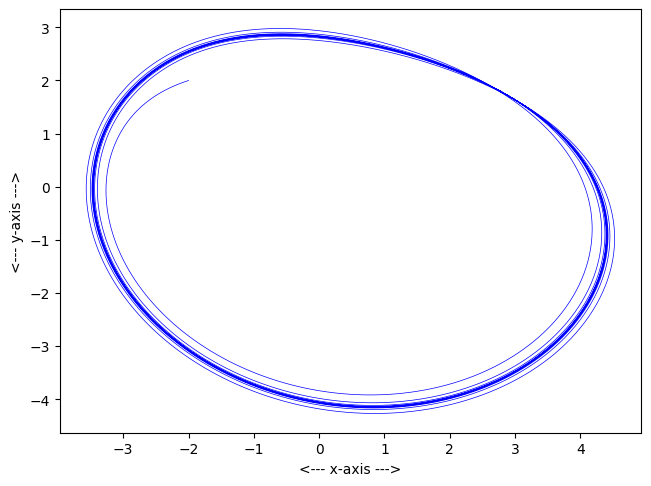

In [6]:
plt.figure ( figsize = (7.5,5.5))
plt.plot ( x_1, y_1, linewidth = 0.5, color = 'b' )
plt.xlabel ( '<--- x-axis --->' )
plt.ylabel ( '<--- y-axis --->' )
plt.savefig('Rossler_2d.pdf', format='pdf')

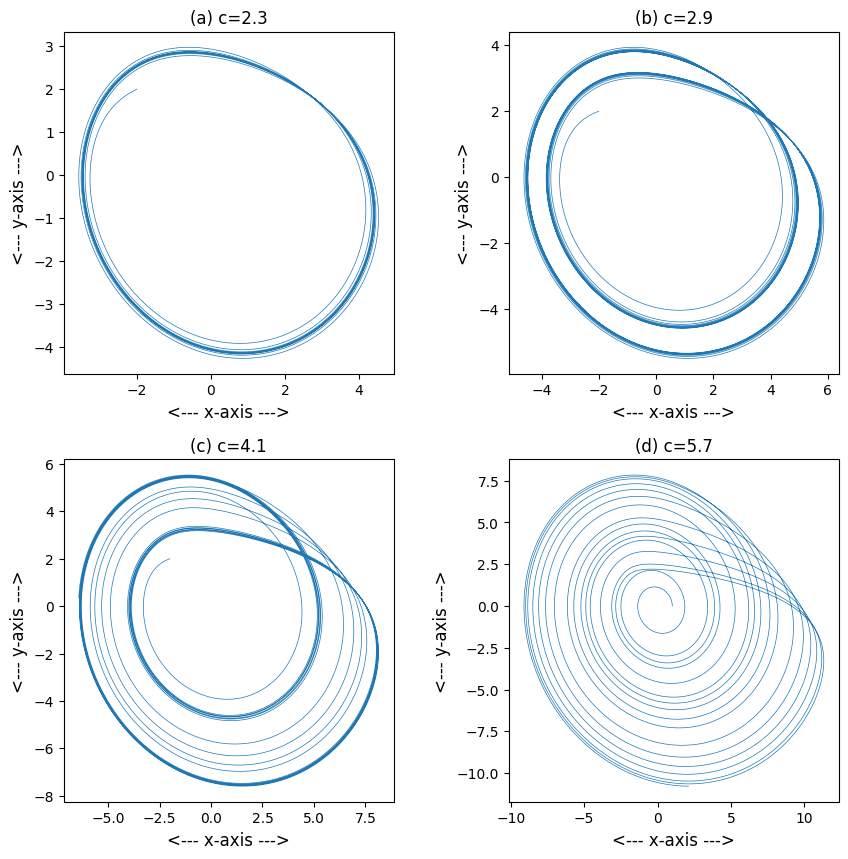

In [7]:
plt.figure ( figsize = (10,10))
plt.subplots_adjust(wspace=0.35, hspace=0.25)
plt.subplot(2,2,1)
plt.plot ( x_1, y_1, linewidth = 0.5 )
plt.xlabel ( '<--- x-axis --->' ,fontsize=12)
plt.ylabel ( '<--- y-axis --->' ,fontsize=12)
plt.title("(a) c=2.3")

plt.subplot(2,2,2)
plt.plot ( x1, y1, linewidth = 0.5)
plt.xlabel ( '<--- x-axis --->' ,fontsize=12)
plt.ylabel ( '<--- y-axis --->' ,fontsize=12)
plt.title("(b) c=2.9")

plt.subplot(2,2,3)
plt.plot ( x, y, linewidth = 0.5 )
plt.xlabel ( '<--- x-axis --->' ,fontsize=12)
plt.ylabel ( '<--- y-axis --->' ,fontsize=12)
plt.title("(c) c=4.1")

plt.subplot(2,2,4)
plt.plot ( x_, y_, linewidth = 0.5 )
plt.xlabel ( '<--- x-axis --->' ,fontsize=12)
plt.ylabel ( '<--- y-axis --->' ,fontsize=12)
plt.title("(d) c=5.7")
plt.savefig('Rossler_2d_2.pdf', format='pdf')


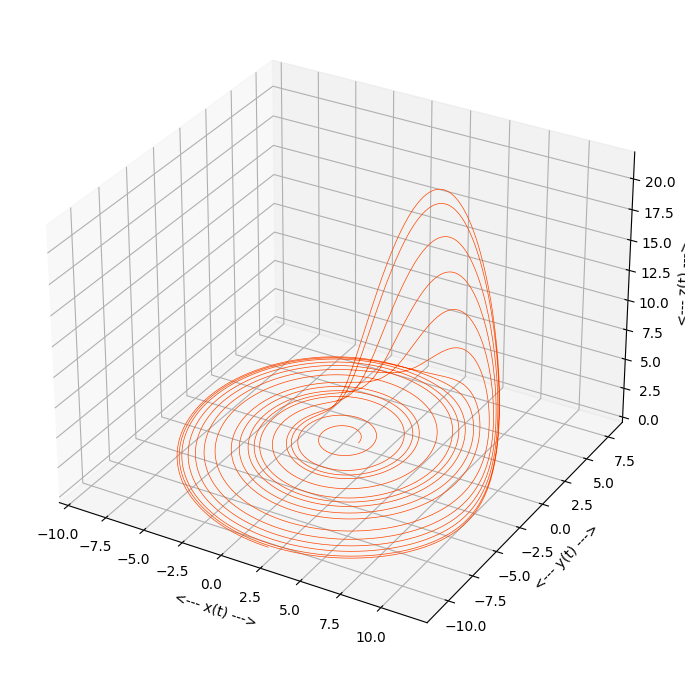

In [8]:
Rossler_ode_plot_3d(x_,y_,z_)